# Financial risk prediction and classification for loan approval

# 1.Introduction
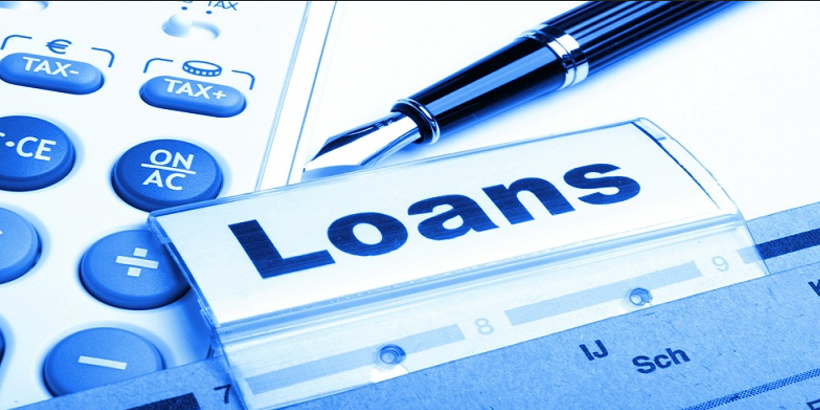

## 1.1. Project description: 

In the modern financial landscape, effective risk assessment and accurate loan approval predictions are crucial for minimizing losses and ensuring the sustainability of financial institutions. The ability to evaluate the financial health and reliability of loan applicants can streamline decision-making processes, reduce defaults, and optimize resource allocation.

This project leverages a synthetic dataset of personal and financial data to address two key challenges:

 **1. Risk Assessment:** Estimating **a continuous Risk Score** that reflects the likelihood of financial instability or default for each applicant.
 
 **2. Loan Approval Prediction:** Developing a binary classification model to determine whether a loan application should be **approved or denied** based on the applicant’s profile.
 
By building robust machine learning models, this project aims to provide insights into key factors influencing risk and loan approval decisions, offering a foundation for improved lending strategies.

## 1.2. Problem satement: 
This project addresses two specific tasks:

 1. Risk Score Prediction: Predict a continuous variable, the RiskScore, which quantifies the risk associated with an individual.
    - Example: Predicting a RiskScore of 0.75 for an applicant suggests a higher likelihood of default than a score of 0.25.
     
 2. Loan Approval Prediction: Perform binary classification to determine the loan approval outcome (LoanApproved = 1 for approval, 0 for denial).
    - Example: Based on the applicant's data, predicting LoanApproved = 0 means the applicant is not eligible for the loan.

## 1.3. Objectives of the project

1. Develop **a regression model** to accurately predict the RiskScore for each applicant (Supervised learning -Offline).
2. Build **a classification model** to predict whether a loan application will be approved (Supervised learning -Offline).
3. Analyze and interpret key features influencing risk and approval decisions.
4. Evaluate the performance of the models using appropriate metrics.
6. Present actionable insights for improving risk assessment and decision-making processes.
7. Give and developpe the solution for this problem in 3 weeks

## 1.4. Dependecies

In [37]:
# Data manipulation and handling
import pandas as pd
import numpy as np
from pandas import DataFrame
from pathlib import Path

# Mathematical operations
import math

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,StratifiedKFold,GridSearchCV,KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression models
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics for regression
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
)

# Metrics for classification
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix
)

# Other utilities
import warnings
warnings.filterwarnings("ignore")  # To suppress warnings during experiments


# 2. The big picture

## 2.1. Frame the problem

- Is it	supervised,	unsupervised or Reinforcement Learning?
  
This projects is about supervised learning since we have labeled training examples (each instance has RiskScore and LoanApporval status.

- Is it a classification	task, aregression task or something	else?
  
The project will handle two tasks: classification for classifiing if a demande will be approved or not (binary classification) and regression for predicting a continous variable, the riskSCore.

- Should you	use	batch	learning	or	online	learning	techniques?

There is	no	continuous	flow	of	data	coming	in	the	system,	there	is	no
 particular	need	to	adjust	to	changing	data	rapidly	so	plain	batch	learning	should	do	just	fine.

## 2.2. Measure performance

 - For Regression: for example Mean Squared Error (MSE), Mean Absolute Error (MAE), R².
 - For Classification: for example Accuracy, Precision, Recall, F1 Score, ROC-AUC.
 > we can add something else, but this is the basic measure to be used

# 3. Collecting the data

## 3.1. About Dataset

It's a synthetic sataset for Risk Assessment and Loan Approval Modeling that we toke from Kaggle https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval/data.

This synthetic dataset comprises 20,000 records and 36 features of personal and financial data, designed to facilitate the development of predictive models for risk assessment. 

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

   - ApplicationDate: Loan application date
   - Age: Applicant's age
   - AnnualIncome: Yearly income
   - CreditScore: Credit worthiness score (for more details see the explanation above)
   - EmploymentStatus: Job situation
   - EducationLevel: Highest education attained
   - Experience: Work experience
   - LoanAmount: Requested loan size
   - LoanDuration: Loan repayment period
   - MaritalStatus: Applicant's marital state
   - NumberOfDependents: Number of dependents
   - HomeOwnershipStatus: Homeownership type
   - MonthlyDebtPayments: Monthly debt obligations
   - CreditCardUtilizationRate: Credit card usage percentage
   - NumberOfOpenCreditLines: Active credit lines
   - NumberOfCreditInquiries: Credit checks count
   - DebtToIncomeRatio: Debt to income proportion
   - BankruptcyHistory: Bankruptcy records
   - LoanPurpose: Reason for loan
   - PreviousLoanDefaults: Prior loan defaults
   - PaymentHistory: Past payment behavior
   - LengthOfCreditHistory: Credit history duration
   - SavingsAccountBalance: Savings account amount
   - CheckingAccountBalance: Checking account funds
   - TotalAssets: Total owned assets
   - TotalLiabilities: Total owed debts
   - MonthlyIncome: Income per month
   - UtilityBillsPaymentHistory: Utility payment record
   - JobTenure: Job duration
   - NetWorth: Total financial worth
   - BaseInterestRate: Starting interest rate
   - InterestRate: Applied interest rate
   - MonthlyLoanPayment: Monthly loan payment
   - TotalDebtToIncomeRatio: Total debt against income
   - LoanApproved: Loan approval status
   - RiskScore: Risk assessment score

**What is credit score?**

According to https://www.financestrategists.com/banking/credit-score/core?

A credit score is a numerical scale ranging from 300 to 850 that reflects a borrower’s trustworthiness. It is based on a person's credit history, including the number of open accounts, total amounts owed, and payment track record4

Lenders look at this to determine if someone will pay back loans on tie.

A high credit score means you are a low-risk borrower, which can lead to better interest rates on loans and credit cards. A low credit score could mean you will pay higher interest rates, or may not be approved for a loan or credit card at all.

**What is the number of dependents?**

It's the number of people you are directly responsible for supporting financially. Example: children or other relatives for whom you pay for most of the necessities of life. It could include others such as an elderly parent who lives with you or a sibling you care form or an adult child who can't care for themselves.

## 3.2. Data loading

In [38]:
DATA =Path("./datasets") # to be changed according to the data folder
assert DATA.exists()

In [39]:
loans_df=pd.read_csv(DATA/"Loan.csv", low_memory=False)
loans_df.shape

(20000, 36)

# 4.Data exploration

## 4.1. Creating a cupy of the data

In [40]:
loans_df_c=DataFrame(loans_df)

## 4.2. Study of the attributes and their caracteristics)

In [41]:
print("\nHead of the dataset Loans:\n", loans_df.head())
print("\nTail of the dataset Loans: \n", loans_df.tail())
print("\nInformations about the dataset Loans: \n", loans_df.info())
print("\n The memory usage \n", loans_df.memory_usage())


Head of the dataset Loans:
   ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000   

***Important remark:***
***The dataset doesn't have any null value.***

In [42]:
#getting all columns
all_columns=list(loans_df.columns)
print("The features of the dataset are: \n", all_columns)
#print("Types of the features: \n", loans_df.dtypes)

The features of the dataset are: 
 ['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount', 'LoanDuration', 'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']


In [43]:
#getting numerical columns 
num_columns=[col for col in all_columns if loans_df[col].dtype != object]
print("The numerical columns are: ", num_columns)
print("\n Statistical description of the numerical columns: \n", loans_df.describe())

#getting categorical columns
cat_columns = [col for col in loans_df.columns if loans_df[col].dtype == object]
print("\n A description of the categorical columns: \n")
for col in cat_columns: 
    print(f"\n {loans_df[col].value_counts()}")

The numerical columns are:  ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']

 Statistical description of the numerical columns: 
                 Age   AnnualIncome   CreditScore    Experience     LoanAmount  \
count  20000.000000   20000.000000  20000.000000  20000.000000   20000.000000   
mean      39.752600   59161.473550    571.612400     17.522750   24882.867800   
std       11.622713   40350.845168     50.997358     11.316836   13427.421217   
min

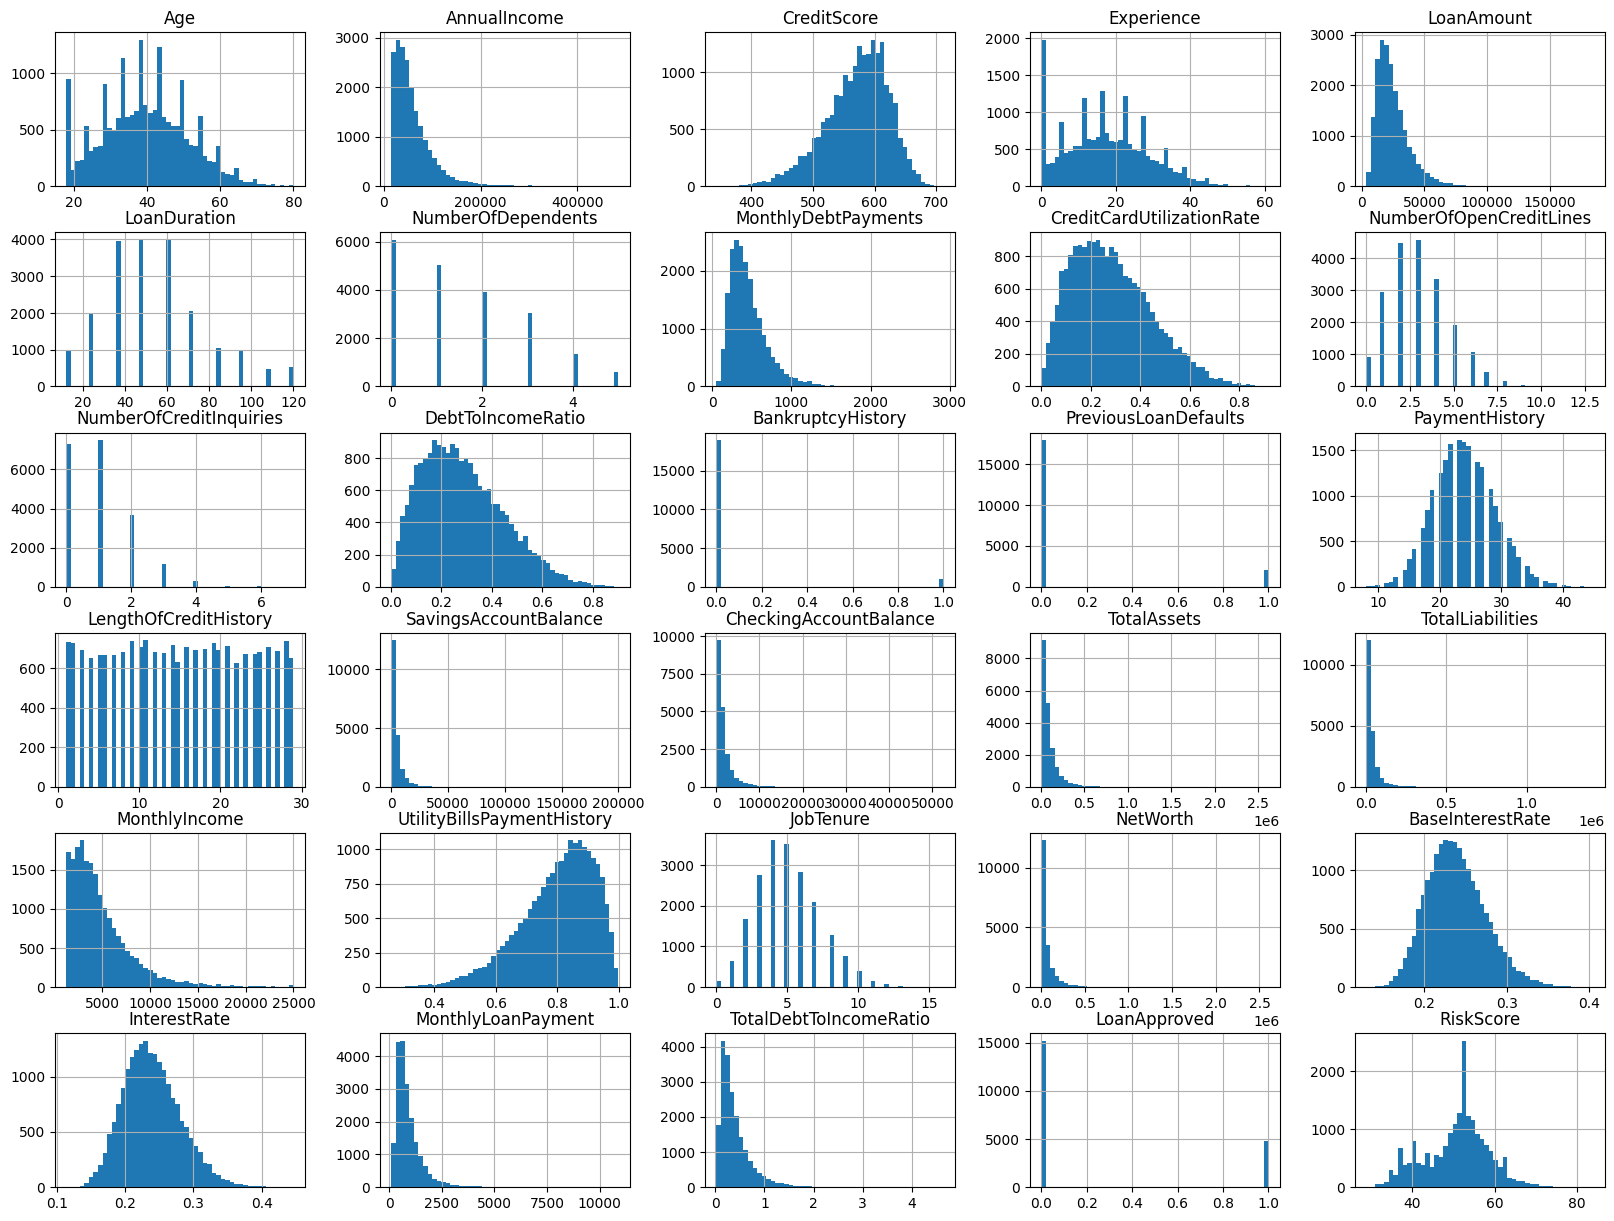

In [44]:
#exploring the numerical columns with histogram technique 
loans_df.hist(bins=50,	figsize=(20,15))
plt.show()

## 4.3. Identification of the target attributs

 - For the regression task: the target variable is continuous and it's the RiskScore, that will be predicted.
 - For the classification task: the target variable is the discret feauture LoanApproved. It takes two possible values, '0' for the Class 0 and '1' for the Class 1, so it's a binary classification.

In [45]:
#Getting the target columns

#Target of the regression task: The countinuous feature RiskScore
y_reg=loans_df["RiskScore"]

#Target of the classification task: The discret feature LoanApproved
y_clf=loans_df["LoanApproved"]
y_clf.value_counts()

#selecting the data (without the target features)
all_columns.remove('LoanApproved')
all_columns.remove( 'RiskScore')
X=loans_df[all_columns]

In [46]:
#let's verifiy the shapes
X.shape, y_reg.shape, y_clf.shape

((20000, 34), (20000,), (20000,))

## 4.4. Creating a Test Set

Why do we need to sample the dataset at this stage? 
"It may sound a bit strange to voluntarily set aside	part of	the	data at	this stage.	After
 all,	you	have	only	taken	a	quick	glance	at	the	data,	and	surely	you	should	learn	 
 whole	lot	more	about	it	before	you	decide	what	algorithms	to	use,	right?	This	 
 true,	but	your	brain	is	an	amazing	pattern	detection	system,	which	means	that	it
 is	highly	prone	to	overfitting:	if	you	look	at	the	test	set,	you may	stumble	 on
 some	seemingly	interesting	pattern	in	the	test	data	that	leads	you	to	sel t	a
 particular	kind	of	Machine	Learning	model.	When	you	estima 	the
 generalization	error	using	the	test	set,	your	estimate	will	be	too	optimis c	and
 you	will	launch	a	system	that	will	not	perform	as	well	as	ex**pect d. This	i call d
 datg bias**p" \[Hands On Machine Learning with Scikit-Learn-Aurelien Geron book\]ing	bias.

In [47]:
df_train, df_test = train_test_split(loans_df, test_size=0.2, random_state=1)
df_train.shape, df_test.shape

((16000, 36), (4000, 36))

In [48]:
#splitting for regression task 
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=1)
#spliting for classification task 
_, _, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.2, random_state=1)

#Remark: the two task have the same X_train and X_test 

In [49]:
#check the shapes 
X_train.shape, X_test.shape, y_reg_train.shape, y_reg_test.shape, y_clf_train.shape, y_clf_test.shape

((16000, 34), (4000, 34), (16000,), (4000,), (16000,), (4000,))

## 4.5. Data Visualization 

So	far	we	have	only	taken	a	quick	glance	at	the	data	to	get	a	general
understanding	of	the	kind	of	data	we are	manipulating.	Now	the	goal	is	to	go	a little	bit	more	in	depth.

 > Remark: For the rest the exploration, the sample test set, we are going to put it aside, and don't look at it!h.

### 4.5.1. Understand Feature Distributions
We selected some revelent features according to our knowledge in the financial loans domain. It's intuitive to think about  this list of features, (TotalLiabilities', 'AnnualIncome', 'SavingsAccountBalance',  'CreditScore', 'LoanAmount', 'LoanDuration',) when it comes to give a loan. So we will use Histogram & KDE Plot to understand their distribution. Then we will extract insight like the: skewness, uniformity, or multimodal distributions, identifying outliers or extreme values.

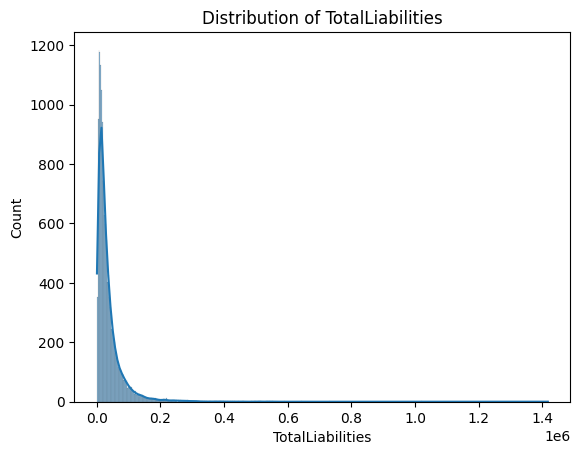

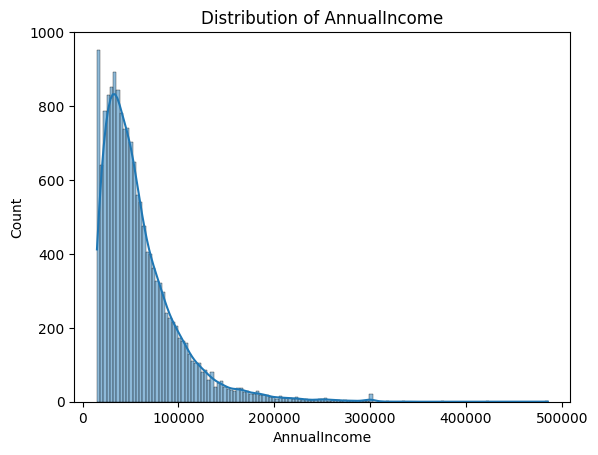

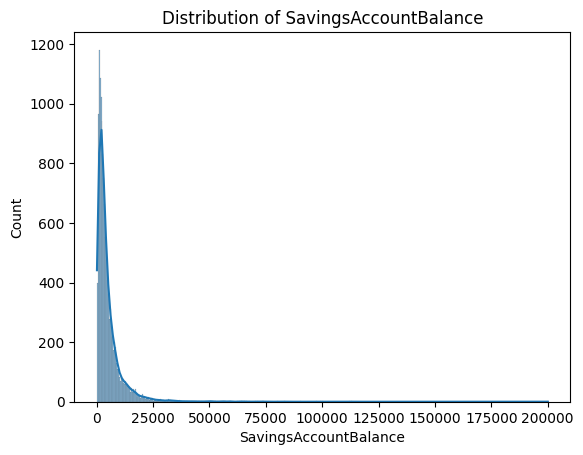

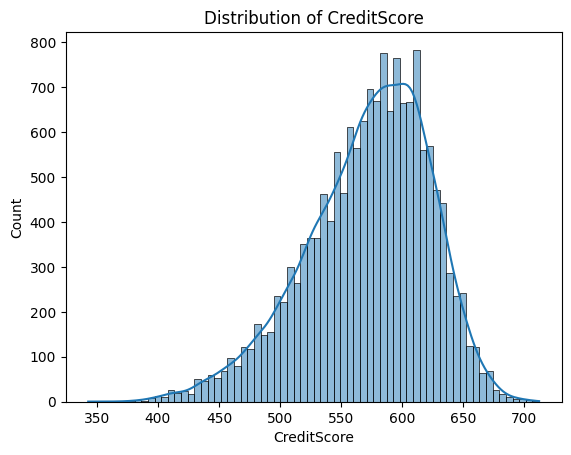

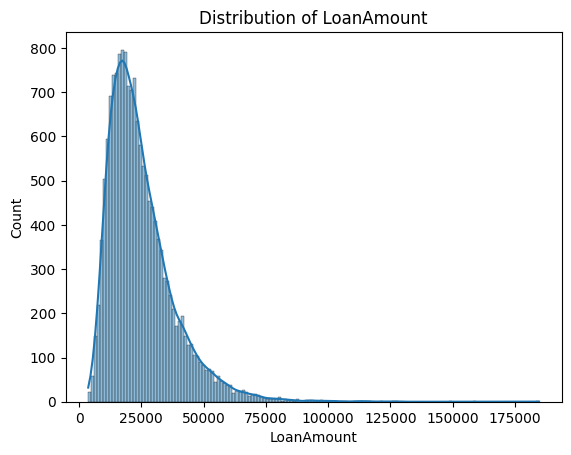

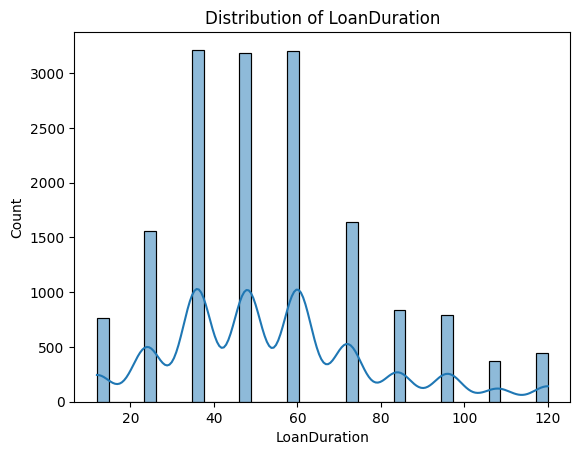

In [50]:

numerical_features = ['TotalLiabilities', 'AnnualIncome', 'SavingsAccountBalance',  'CreditScore', 'LoanAmount', 'LoanDuration',]
for feature in numerical_features:
    sns.histplot(data=X_train, x=feature, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

***Comment:***
- we notice that almost all the features have a general shape of a Gaussian distribution, however they are not symetric for example 'TotalLiabilities' has a long tail on the rightand it is sharp. 'CreditScore' is also left-skewed distributedb (long tail on the left). As consequence, in further steps, we need to do a Standardization / Normalization.
- They are unimodal, so no need for clustring or segmentation of the data.
- We don't notice any outliers.

___

### 4.5.2. Correlation and Relationships Between Variables
First, we'll study the correlation between variables, then select the most correlated variables inorder to analyse in detail their relationships.
We will focus on key variables like Age, LoanAmount, AnnualIncome, and RiskScore ..etc
Look for clusters, linear relationships, or outliers.

For this purpose, we are using the Heatmap of Correlation Matrix.

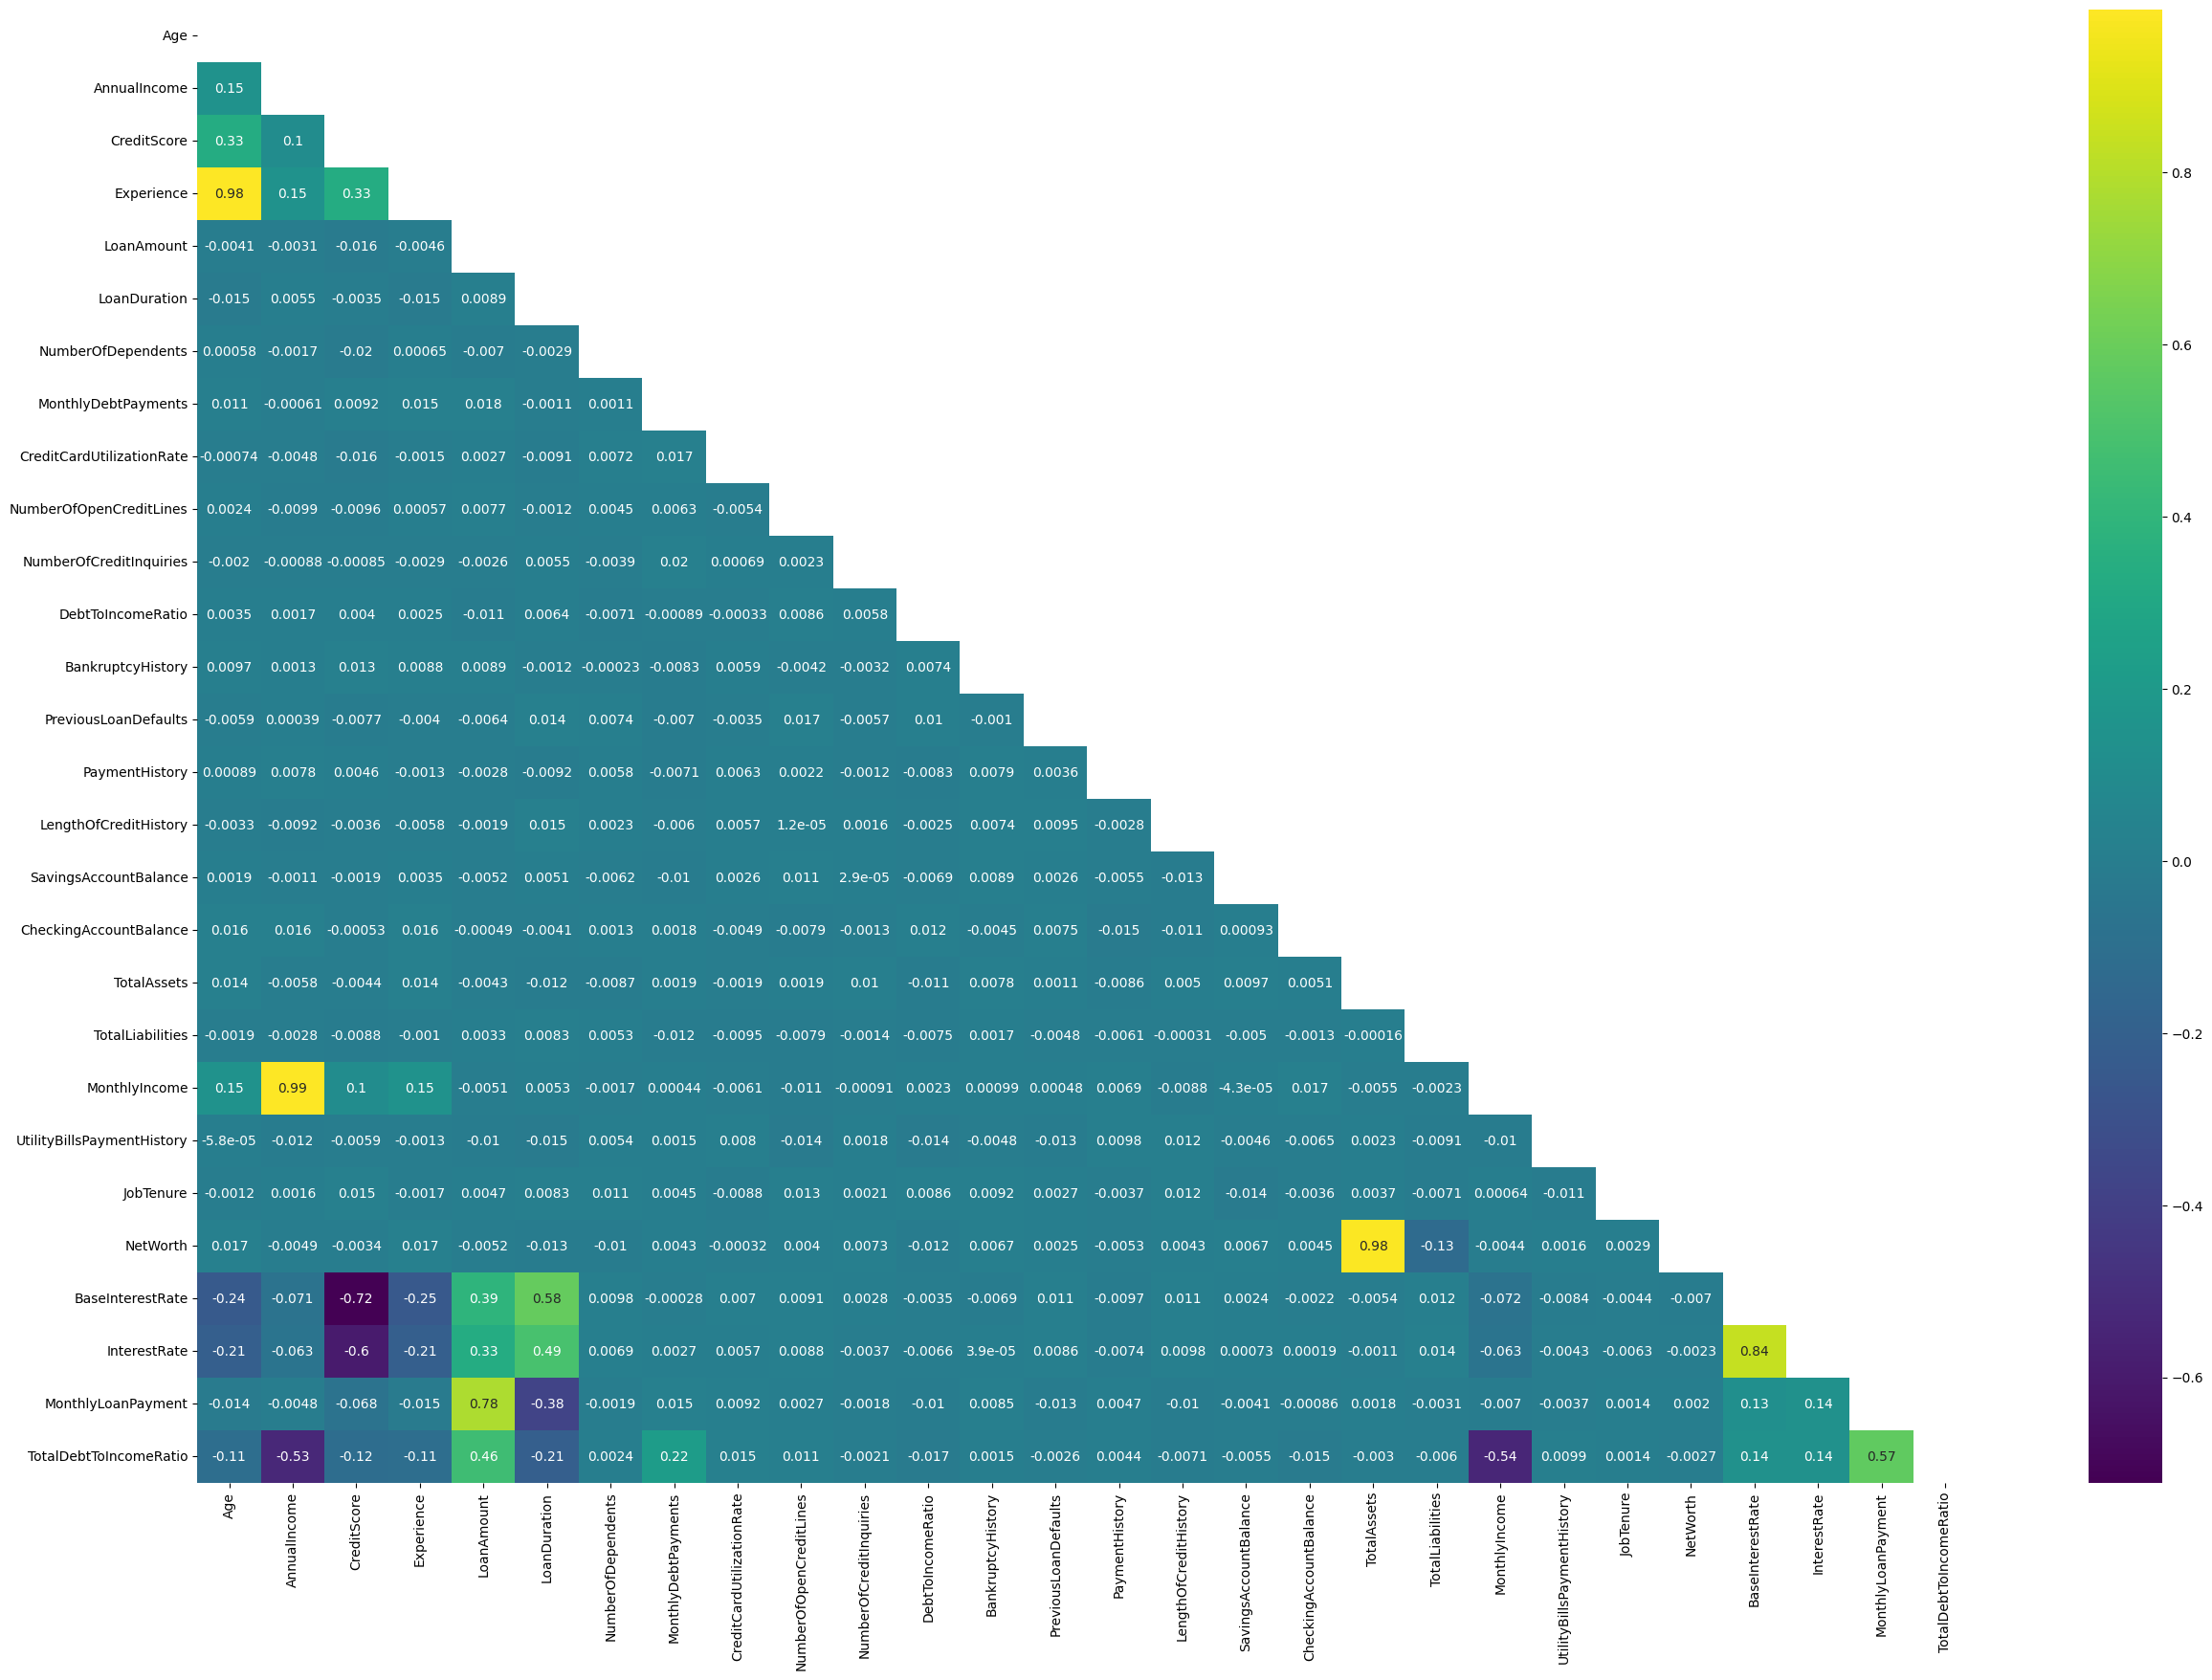

In [51]:
plt.figure(figsize=(30, 20))
mask = np.triu(np.ones_like(X_train.corr(numeric_only=True), dtype=bool))
ax = sns.heatmap(
    X_train.corr(numeric_only=True),
    cbar=True,
    annot=True,
    cmap="viridis",
    mask=mask,
)

***Comment:***

There is a strong positive correlation between: 

    -AnnualIncome and MonthlyIncome
    -TotalAssets and NetWorth
    -BaseInterestRate and InterestRate
    -Age and experience
There is a strong negative correlation between: 

    -CreditScore and BaseInterestRate

___

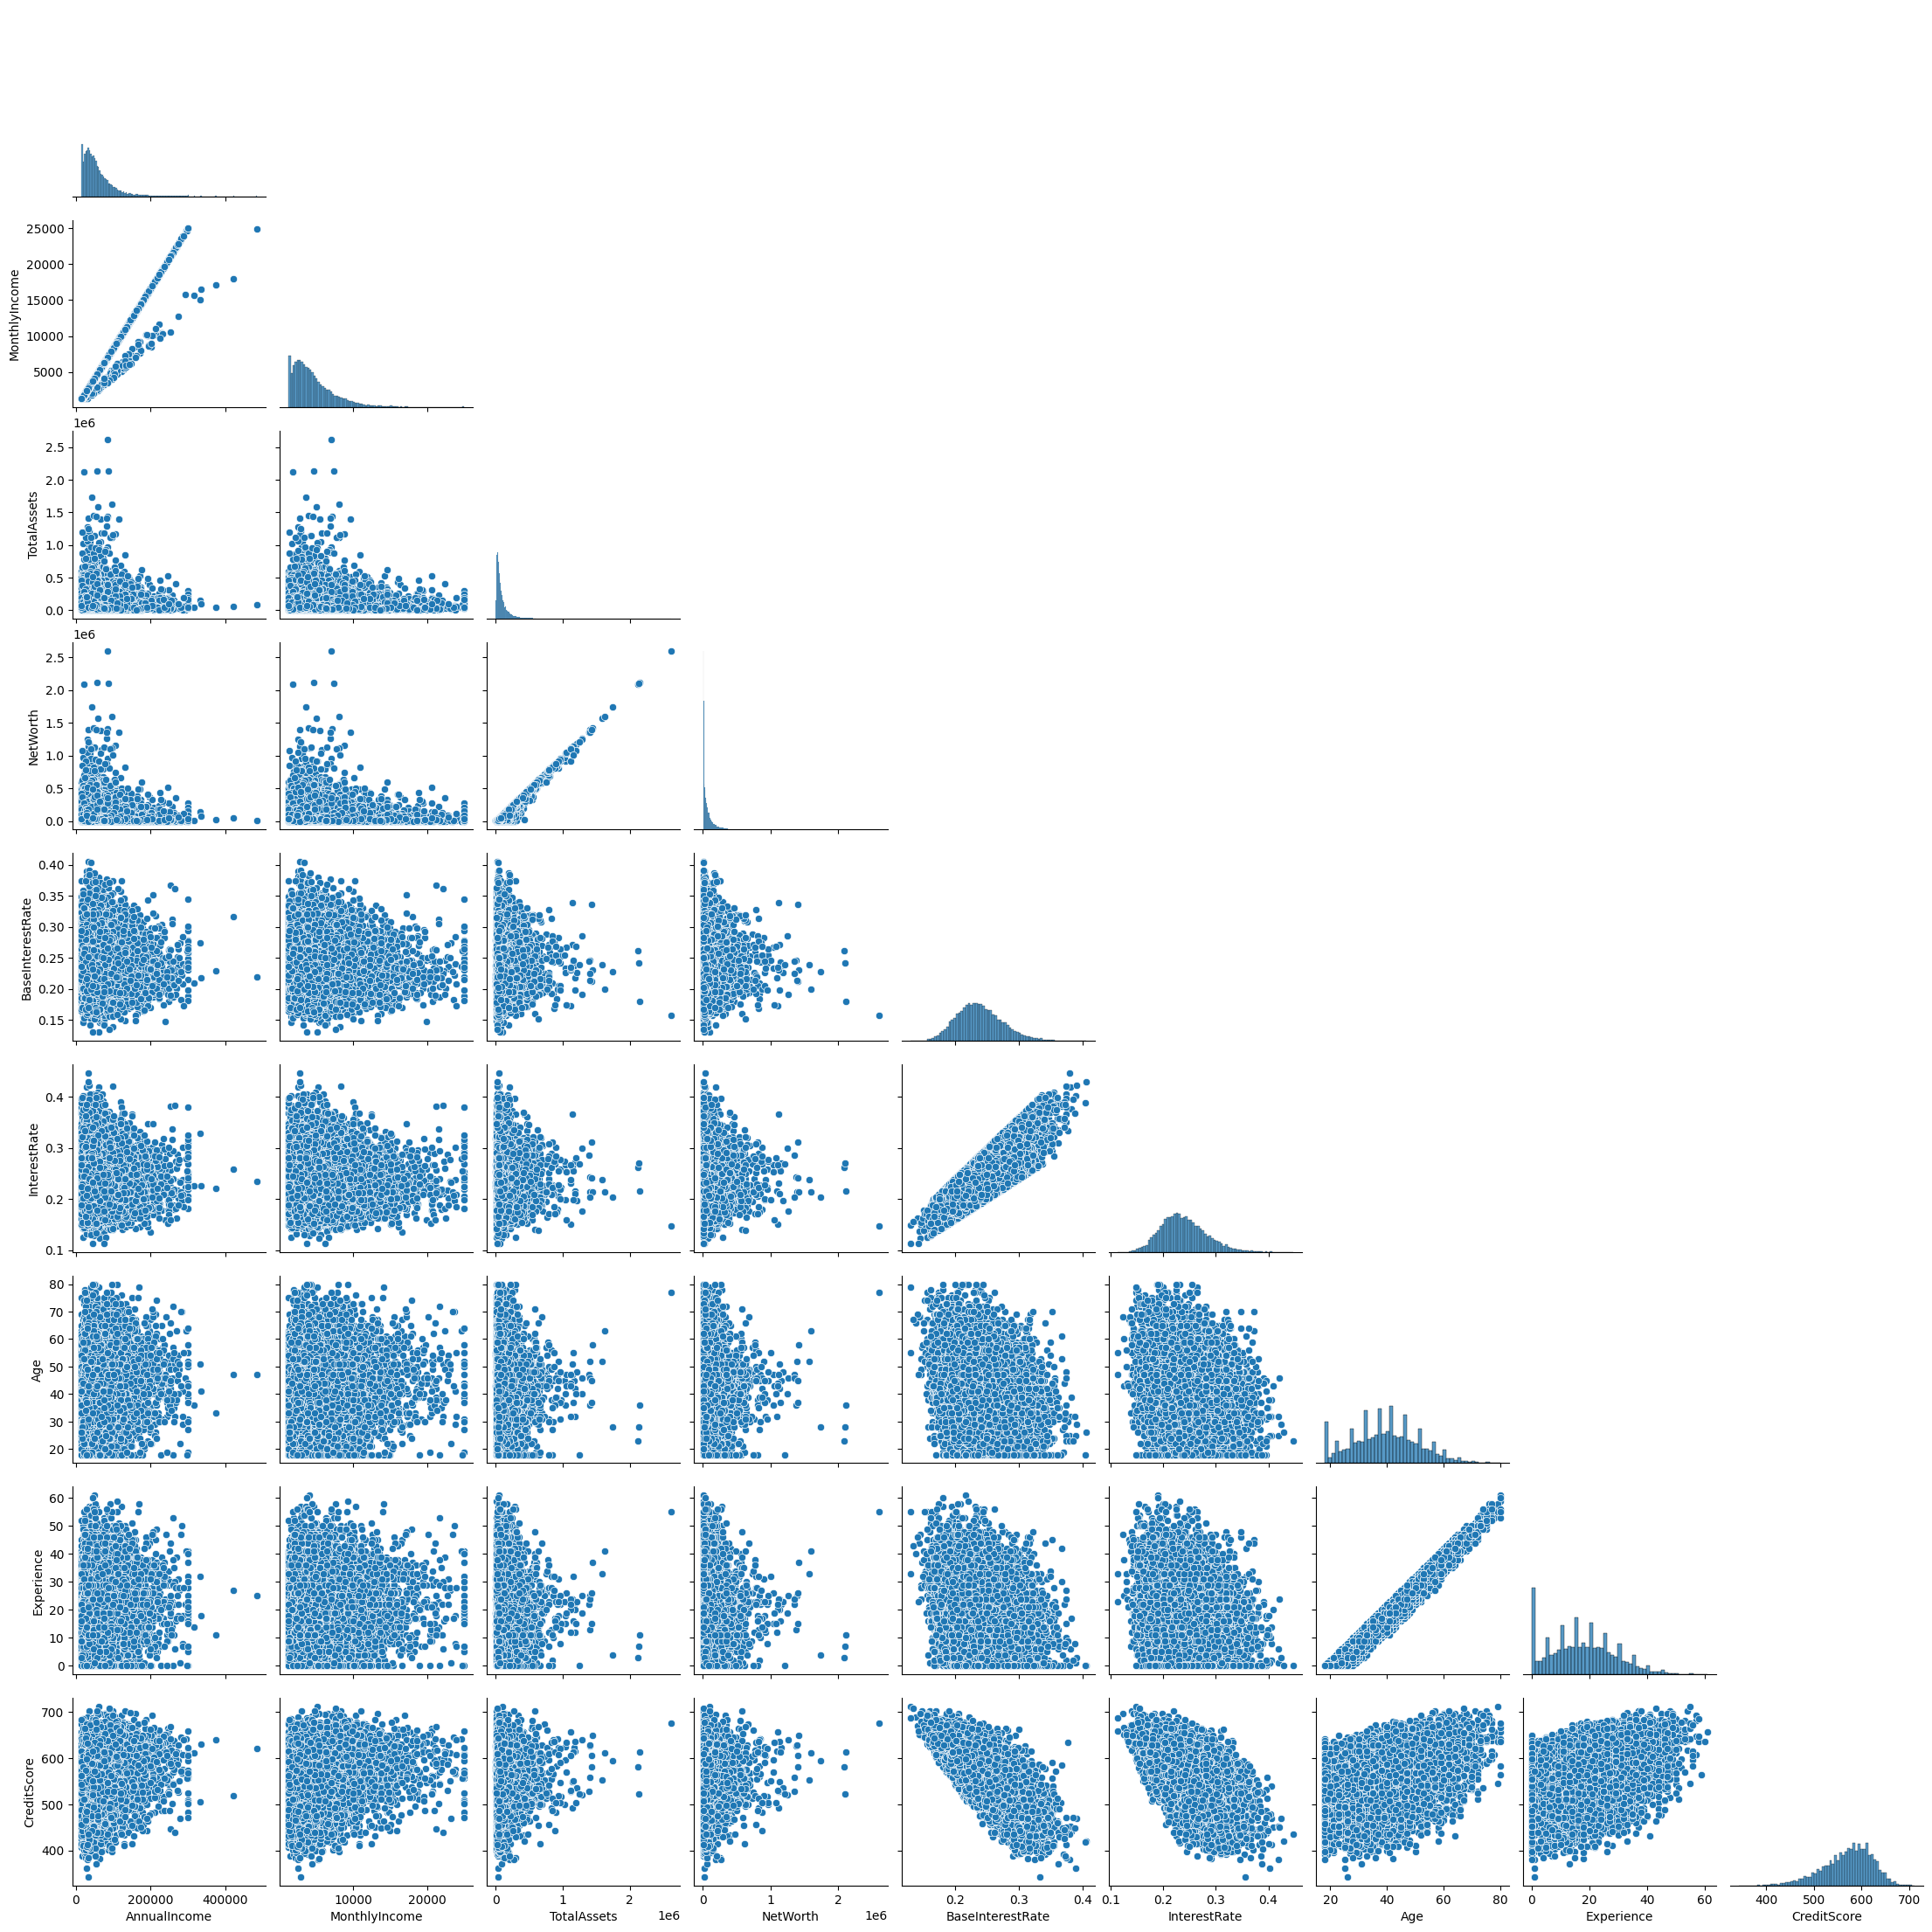

In [52]:
correlatedFeatures=['AnnualIncome', 'MonthlyIncome', 'TotalAssets', 'NetWorth', 'BaseInterestRate',  'InterestRate','Age', 'Experience', 'CreditScore'  ]
sns.pairplot(X_train[correlatedFeatures],corner=True)
plt.show()

- There is linear relation between AnnualIncome and MonthlyIncome 
- Linear between TotalAssets and NetWorth, BaseInterestRate and InterestRate, Age and experience
- linear decreasing CreditScore and BaseInterestRate

### 4.5.3. Explore Categorical Features

 To visualize the distribution of categories ( EmploymentStatus, EducationLevel, MaritalStatus). Tjis will let us to count the occurrences of each category and identify imbalances.


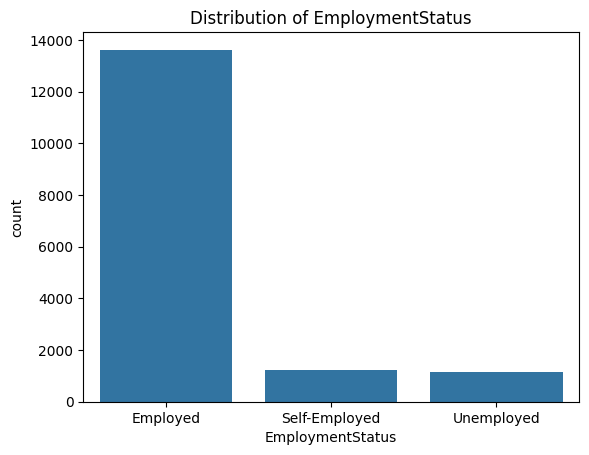

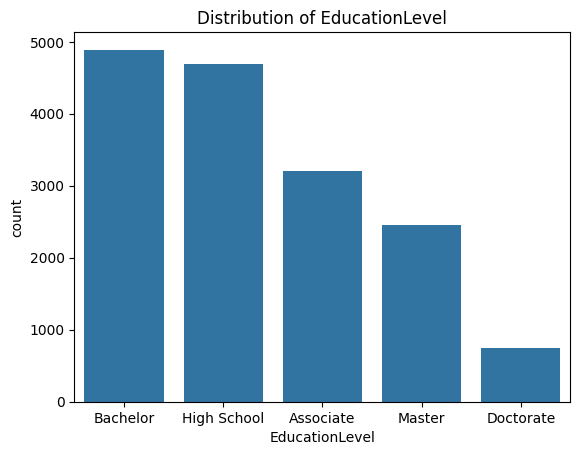

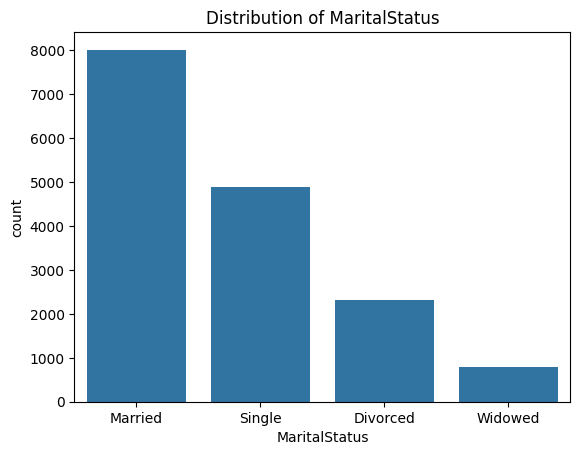

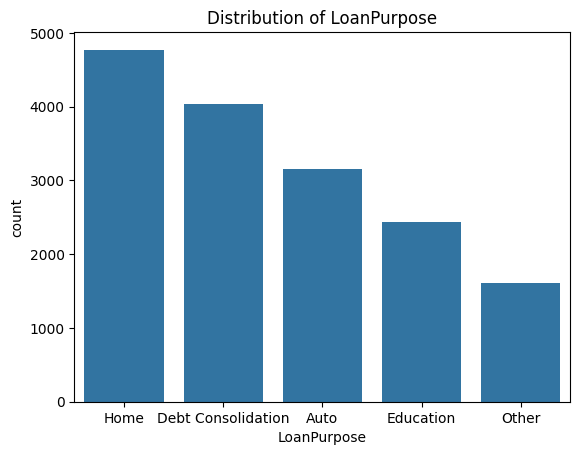

In [312]:
categorical_features = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'LoanPurpose']
for feature in categorical_features:
    sns.countplot(data=X_train, x=feature, order=X_train[feature].value_counts().index)
    plt.title(f"Distribution of {feature}")
    plt.show()


### 4.5.4. Time Analysis (Yearly)
To explore trends in LoanApproved or RiskScore over time.

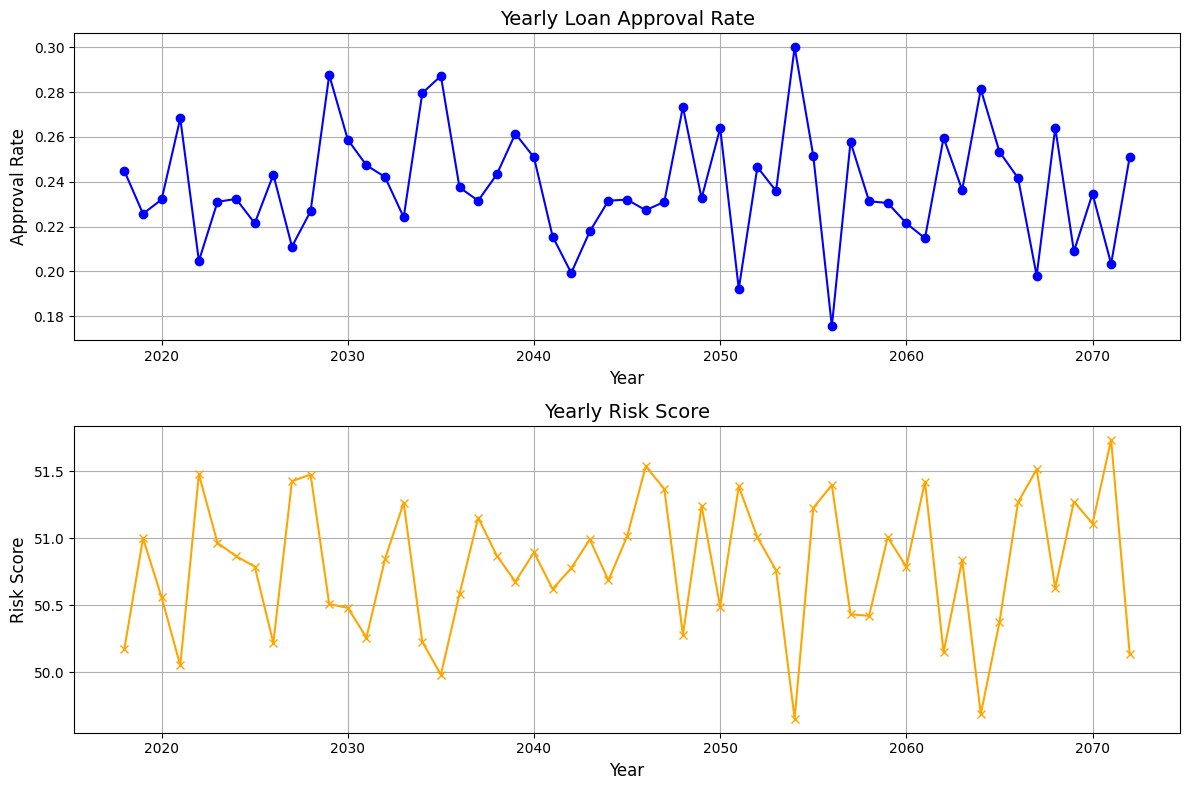

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_train is already created and columns exist
df_train['ApplicationDate'] = pd.to_datetime(df_train['ApplicationDate'])
df_train['Year'] = df_train['ApplicationDate'].dt.to_period('Y')

# Aggregating yearly averages
yearly_approvals = df_train.groupby('Year')['LoanApproved'].mean()
yearly_risks = df_train.groupby('Year')['RiskScore'].mean()

# Converting index to datetime for plotting
yearly_approvals.index = yearly_approvals.index.to_timestamp()
yearly_risks.index = yearly_risks.index.to_timestamp()

# Creating subplots
plt.figure(figsize=(12, 8))

# Plot 1: Yearly Loan Approval Rate
plt.subplot(2, 1, 1)
plt.plot(yearly_approvals.index, yearly_approvals, label='Loan Approval Rate', marker='o', color='blue')
plt.title("Yearly Loan Approval Rate", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Approval Rate", fontsize=12)
plt.grid()

# Plot 2: Yearly Risk Score
plt.subplot(2, 1, 2)
plt.plot(yearly_risks.index, yearly_risks, label='Risk Score', marker='x', color='orange')
plt.title("Yearly Risk Score", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Risk Score", fontsize=12)
plt.grid()

plt.tight_layout()
plt.show()


***Comment:*** 
As expected there is direct inverse relationships between the riskScore and LoanApproved ( a negative correlation)
The rates variate in years, not a special behaviour.

___

### 4.5.5. Feature-Target Relationships
The relation between LoanApproved and RiskScore, seen in an other graphic inroder to explore in more details the privious comment.

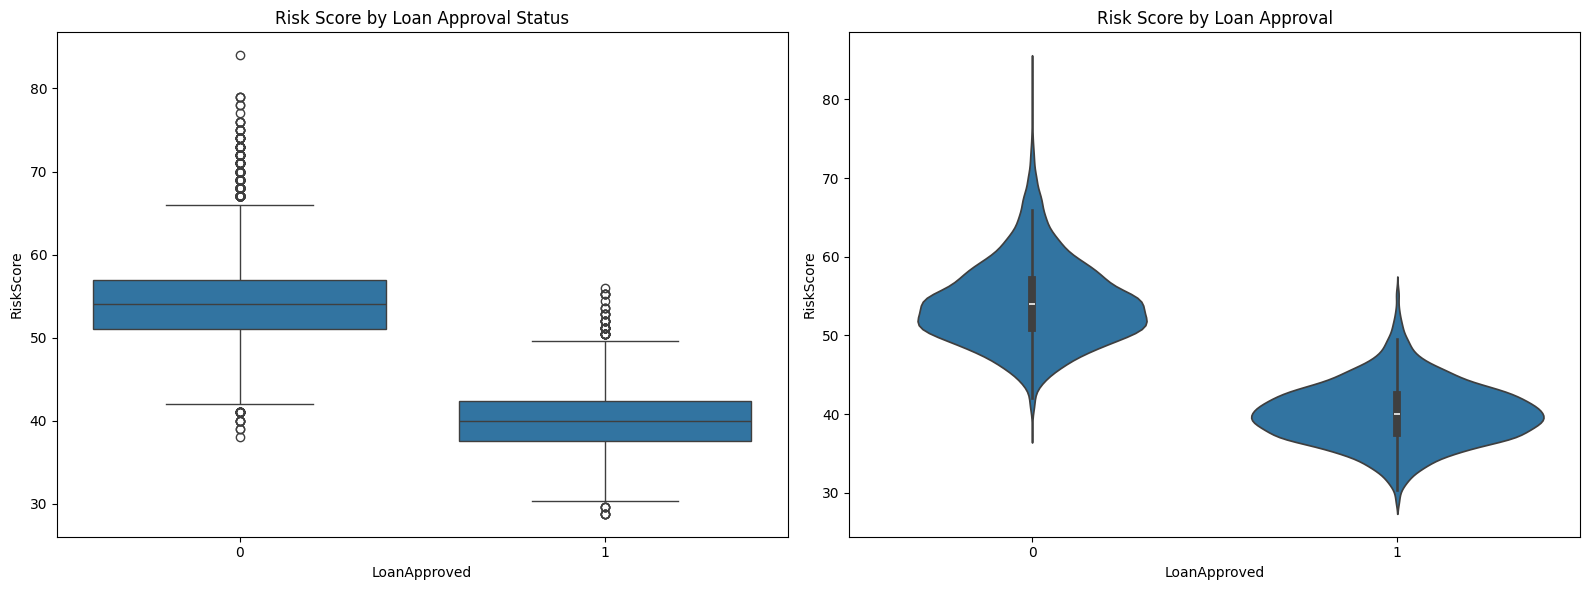

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# First Graph: Boxplot
sns.boxplot(data=df_train, x='LoanApproved', y='RiskScore', ax=axes[0])
axes[0].set_title("Risk Score by Loan Approval Status")

# Second Graph: Violin plot
sns.violinplot(data=df_train, x='LoanApproved', y='RiskScore', ax=axes[1])
axes[1].set_title("Risk Score by Loan Approval")

# Show the combined plots
plt.tight_layout()
plt.show()

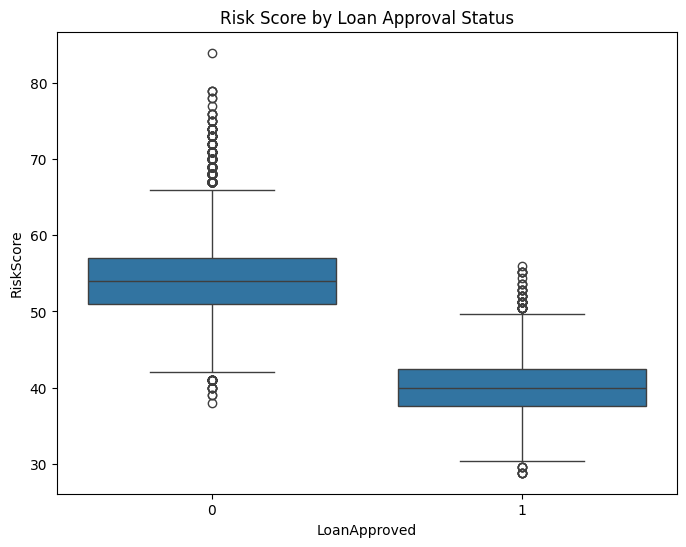

In [63]:

# Plot a single boxplot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.boxplot(data=df_train, x='LoanApproved', y='RiskScore')
plt.title("Risk Score by Loan Approval Status")
plt.show()

***Comment 1:***
   
   - 
   - The boxplot displays the distribution of `RiskScore` for each `LoanApproved` category (0: Not Approved, 1: Approved).  
   - **Key observations:**  
     - For loans that were not approved (LoanApproved = 0), the `RiskScore` tends to be higher, with a median around 55.  
     - For approved loans (LoanApproved = 1), the `RiskScore` is generally lower, with a median close to 45.  
     - The whiskers show the spread of the data, and there are several outliers in the `LoanApproved = 0` category with very high `Rish   - t):**  
   - The violin plot combines a boxplot with a kernel density estimate, giving insight into the distribution's shape and spread.  
   - **Key observations:**  
     - The density for `LoanApproved = 0` shows a wide spread, with most values clustered around 55, indicating higher `RiskScore` values.  
     - For `LoanApproved = 1`, the distribution is narrower and concentrated around 45, indicating lower `RiskScore` values for adjust the language further?

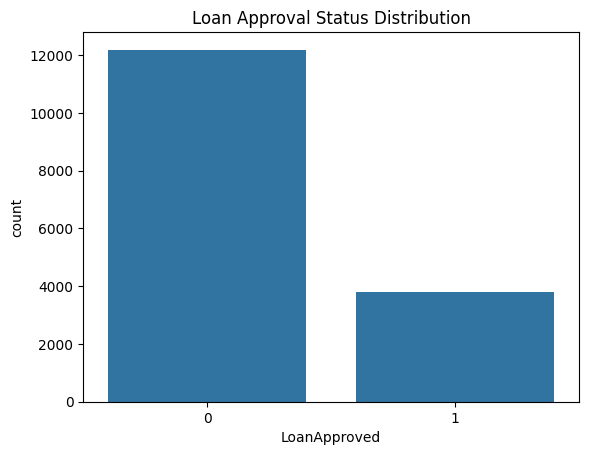

In [27]:
#Graph 3
sns.countplot(data=df_train, x='LoanApproved')
plt.title("Loan Approval Status Distribution")
plt.show()


***Comment 2:***
We are dealing with an unbalanced dataset (training set) with 12000 not approved cases and 4000 approved cases

## 4.6. The promising transformations: 

- Standardization of the numerical features 
- Feature ingineering to delete the high correlated features e.g. MonthlyIncome and AnnualIncome ..etc by making combinations or deleting one ..etc (see next chapter Data preparation) 
- As we don't have any missing value so there will not be any handling of missing values 
- Remove the outliers of some features (riskScore) 
- In further evaluation, we will take into account the unbalanced caracteristic of the dataset (according to the target LoanApproved) by choosing adapted features.
    

# 5. Data preparation 

## 5.1. Handling correlated features

How can we decide to drop which feature? 
- MonthlyIncome could be derived from AnnualIncome => drop AnnualIncome
- Age and experience are correlated but they are two independent features, so we keep them.
- NetWorth = TotalAssets - TotalLiabilities ? => Not really, see the cells below
- Also drop the ApplicationDate because it doesn't bring any insight for our coming tasks.>


> ***REMARK: Correlation can be handled and supported by some models but not all, so in the future when we are going to do model selection we will evaluate this.***

## 5.2. Pipeline

Here we orgenize all the data transformation into one step.

In [30]:
X_train.shape, y_clf_train.shape, y_reg_train.shape, X_test.shape, y_reg_test.shape, y_clf_test.shape

((16000, 34), (16000,), (16000,), (4000, 34), (4000,), (4000,))

In [31]:
to_be_scaled=num_columns
to_be_scaled.remove('AnnualIncome')
to_be_scaled.remove('LoanApproved')
to_be_scaled.remove('RiskScore')

# Define columns to drop
to_be_droped=['AnnualIncome', 'ApplicationDate']

# Update numeric and categorical columns to exclude the dropped ones
num_columns = [col for col in num_columns if col not in to_be_droped]
cat_columns = [col for col in cat_columns if col not in to_be_droped]

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing for both numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, to_be_scaled),
        ('cat', categorical_transformer, cat_columns)  # Example: excluding the first category
    ],
    remainder='passthrough'  # Keep remaining columns if necessary
)

# Full pipeline without the invalid 'drop' step
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Drop the columns manually before applying the pipeline
X_train = X_train.drop(columns=to_be_droped, axis=1)
X_test = X_test.drop(columns=to_be_droped, axis=1)

# Fit and transform the data
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

# Convert the output back to a DataFrame with meaningful feature names
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=feature_names)


In [32]:
X_train_preprocessed.shape, y_clf_train.shape, y_reg_train.shape, X_test_preprocessed.shape, y_reg_test.shape, y_clf_test.shape

((16000, 43), (16000,), (16000,), (4000, 43), (4000,), (4000,))

# 6. Model selection

## 6.1. Regression task: 

In [321]:
#for regression task
LinearReg = LinearRegression()
RidgeReg = Ridge()
LassoReg = Lasso()
XgbReg = XGBRegressor() 

reg_models = [LinearRegression(),Ridge(),Lasso(), XgbReg]


## 6.2. Classification task: 

For this purpos we will try on different models then select the best one that give the best performance. So we will import some popular algorithms that can be used for binary classification include:

- Logistic Regression
- k-Nearest Neighbors
- Decision Trees
- Support Vector Machine
- Naive Bayes
- XGBoost

In [322]:
# Base models
logRge = LogisticRegression()
kNeigh = KNeighborsClassifier(n_neighbors=3)  # Can fine-tune n_neighbors
dTree = DecisionTreeClassifier(random_state=0)
svc = SVC(gamma='auto') 
gnb = GaussianNB()

# Additional models for financial data
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
gb_clf = GradientBoostingClassifier(random_state=42)
ada_clf = AdaBoostClassifier(random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

catboost_clf = CatBoostClassifier(verbose=0, random_state=42)  # Suppresses training logs by default

# Compile all classifiers
clf_models = [
    logRge,  # Logistic Regression
    kNeigh,  # k-Nearest Neighbors
    dTree,   # Decision Tree
    svc,     # Support Vector Classifier
    gnb,     # Naive Bayes
    rf_clf,  # Random Forest
    gb_clf,  # Gradient Boosting
    ada_clf, # AdaBoost
    xgb_clf, # XGBoost
    catboost_clf # CatBoost
]

# 7. Model training

## 7.1. Model training for regression task

In [323]:
best_model_reg = None
best_score = float('-inf')  
model_scores = {}  

for model in reg_models:
    scores = cross_val_score(model, X_train_preprocessed, y_reg_train, cv=5, scoring='r2')  
    mean_score = scores.mean()
    model_scores[model] = mean_score

    print(model)
    print(f"Cross-validation scores: {scores}")
    print(f"Mean R² score: {mean_score:.4f}")
    
    if mean_score > best_score:
        best_model_reg = model
        best_score = mean_score


print("\nBest Model:")
print(best_model_reg)
print(f"Best Mean R² Score: {best_score:.4f}")

LinearRegression()
Cross-validation scores: [0.78523156 0.79009025 0.78625435 0.77703211 0.78568093]
Mean R² score: 0.7849
Ridge()
Cross-validation scores: [0.78523795 0.79010035 0.78625109 0.77704176 0.78567406]
Mean R² score: 0.7849
Lasso()
Cross-validation scores: [0.63453142 0.62016711 0.61751044 0.62309751 0.61813399]
Mean R² score: 0.6227
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None,

## 7.2. Model training for classification task


Best Classification Model:
LogisticRegression()
Best Accuracy Score: 0.9643


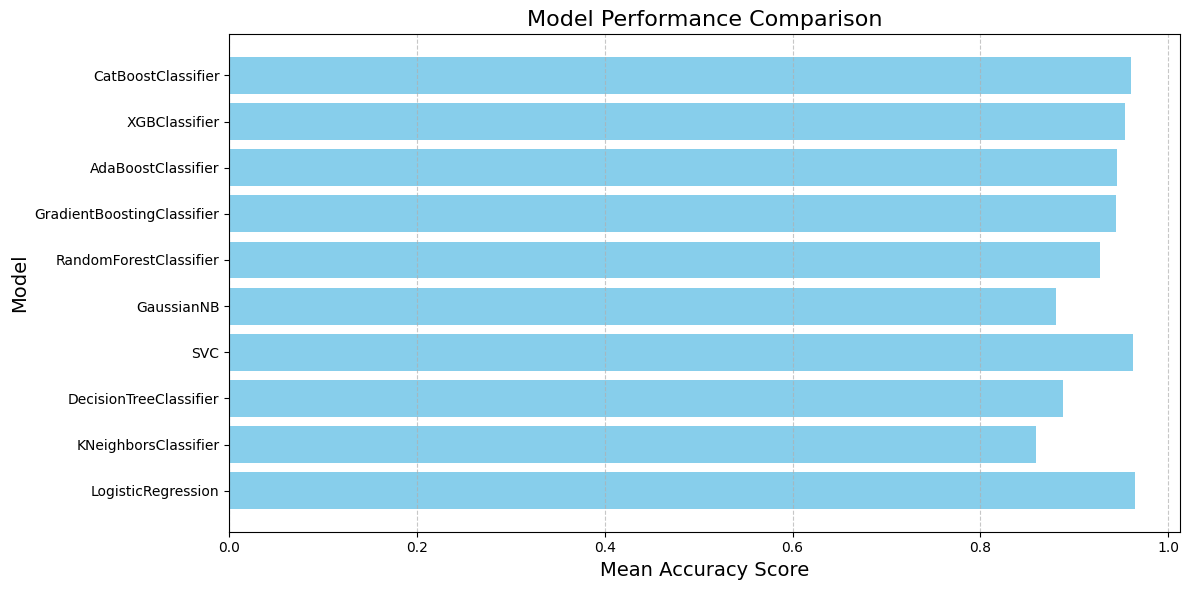

In [324]:
# Initialize variables
best_clf_model = None
best_clf_score = float('-inf')  
model_clf_scores = {}  

# Evaluate each classifier using cross-validation
for clf_model in clf_models:
    # Perform cross-validation
    scores = cross_val_score(clf_model, X_train_preprocessed, y_clf_train, cv=5, scoring='accuracy')  
    mean_score_acc = scores.mean()
    
    # Use the model name as the key
    model_name = clf_model.__class__.__name__
    model_clf_scores[model_name] = mean_score_acc

    # Update the best model if current model has the highest mean accuracy
    if mean_score_acc > best_clf_score:
        best_clf_model = clf_model
        best_clf_score = mean_score_acc

# Print the best model details
print("\nBest Classification Model:")
print(best_clf_model)
print(f"Best Accuracy Score: {best_clf_score:.4f}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(list(model_clf_scores.keys()), list(model_clf_scores.values()), color='skyblue')
plt.xlabel('Mean Accuracy Score', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.title('Model Performance Comparison', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


> #### Apply the PCA to the dataset
> We are going to do a Principal Counpounent Decomposition and make another comparision among the models.

In [325]:
X_train_preprocessed.shape

(16000, 43)

In [326]:
# Initialize variables to track the best result
best_clf_model_pca = None
best_clf_score_pca = float('-inf')
best_n_components = None  
list_components = [3, 4, 6, 10, 15, 20, 25, 30, 35, 40]

# Iterate over the list of components
for N_COMP in list_components:
    # Apply PCA with the current number of components
    pca = PCA(n_components=N_COMP)
    X_train_pca = pca.fit_transform(X_train_preprocessed)  # Apply PCA to the training data
    
    # Evaluate each model using cross-validation
    for clf_model in clf_models:
        scores = cross_val_score(clf_model, X_train_pca, y_clf_train, cv=5, scoring='accuracy')
        mean_score_acc = scores.mean()

        # Store the result in the dictionary with the model and component count
        model_name = clf_model.__class__.__name__ + f"_{N_COMP}PC"
        model_clf_scores_pca[model_name] = mean_score_acc
        
        # Track the best performing model and component count
        if mean_score_acc > best_clf_score_pca:
            best_clf_model_pca = clf_model
            best_clf_score_pca = mean_score_acc
            best_n_components = N_COMP  # Update best_n_components here

In [327]:
# Apply PCA with the best number of components
optimal_pca = PCA(n_components=best_n_components)
X_train_optimal_pca = optimal_pca.fit_transform(X_train_preprocessed)
X_test_optimal_pca = optimal_pca.transform(X_test_preprocessed)

# Retrain the best model on the PCA-reduced data
best_clf_model_pca.fit(X_train_optimal_pca, y_clf_train)

# Evaluate on test data
test_accuracy = best_clf_model_pca.score(X_test_optimal_pca, y_clf_test)

print("\nBest Model Details:")
print(f"Model: {best_clf_model_pca.__class__.__name__}")
print(f"Optimal Number of PCA Components: {best_n_components}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Best Model Details:
Model: LogisticRegression
Optimal Number of PCA Components: 40
Test Accuracy: 0.9695


***Comment:*** 
- Without using the PCA on the data, the model that gives best accuracy is LogisticRegression with `Acc= 96,43%`. After selecting different values of `N_COMP`for the PCA we found out that the optimal number of `N_COMP`is 40, and the the classification model that gives the best accuracy is always LogisticRegression model with `Acc=96,95%`. However, there is not too much difference between the two values of accuracy, is it worth it to do a PCA with 40 Compounent when the data already have 43 features?

- Knowing the primary goal is to reduce dimensionality for computational or storage reasons. But, since the dataset already has only 43 features and the accuracy improvement is marginal, it may not be worth applying PCA with 40 components. The cost of reduced interpretability and added complexity outweighs the minor gain in accuracy.

# 8. Evaluation 

## 8.1. Evaluation of the regression task

In [328]:
best_model_reg.fit(X_train_preprocessed,y_reg_train)
y_pred = best_model_reg.predict(X_test_preprocessed)

r2 = r2_score(y_reg_test, y_pred)
mse = mean_squared_error(y_reg_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_reg_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


R² Score: 0.8966
Mean Squared Error (MSE): 6.2077
Root Mean Squared Error (RMSE): 2.4915
Mean Absolute Error (MAE): 1.6244


## 8.2. Evaluation of the classification task:

#### 8.2.1. Without PCA

In [339]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Fitting the model
best_clf_model.fit(X_train_preprocessed, y_clf_train)
y_pred_clf = best_clf_model.predict(X_test_preprocessed)

# Classification metrics
accuracy = accuracy_score(y_clf_test, y_pred_clf)
precision = precision_score(y_clf_test, y_pred_clf)
recall = recall_score(y_clf_test, y_pred_clf)
f1_score_value = f1_score(y_clf_test, y_pred_clf)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score_value:.4f}")

# Classification report
report = classification_report(y_clf_test, y_pred_clf)
print("\nClassification Report:\n")
print(report)

Accuracy: 0.9692
Precision: 0.9388
Recall: 0.9340
F1 Score: 0.9364

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3031
           1       0.94      0.93      0.94       969

    accuracy                           0.97      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.97      0.97      0.97      4000



#### 8.2.2. With PCA: 

In [330]:
# Apply the model to the test set
X_test_pca = pca.transform(X_test_preprocessed)

In [333]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Fitting the model
best_clf_model_pca.fit(X_train_pca, y_clf_train)
y_pred_clf_pca = best_clf_model.predict(X_test_pca)

# Classification metrics
accuracy = accuracy_score(y_clf_test, y_pred_clf_pca)
precision = precision_score(y_clf_test, y_pred_clf_pca)
recall = recall_score(y_clf_test, y_pred_clf_pca)
f1_score_value = f1_score(y_clf_test, y_pred_clf_pca)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score_value:.4f}")

# Classification report
report = classification_report(y_clf_test, y_pred_clf_pca)
print("\nClassification Report:\n")
print(report)

Accuracy: 0.9695
Precision: 0.9380
Recall: 0.9360
F1 Score: 0.9370

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3031
           1       0.94      0.94      0.94       969

    accuracy                           0.97      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.97      0.97      0.97      4000



# 9. Fine tuning the selected models

- Best model selected for the regression task is: XGBoost
- Best model selected for classification task is: Logistic Regression

## 9.1. Fine tuning for Regression

In [340]:
def plot_feature_importance(model, X_train):
    """
    Manually plot feature importance for XGBoost model
    
    Parameters:
    - model: Trained XGBoost model
    - X_train: Training features (to get feature names)
    
    Returns:
    - None (displays plot)
    """
    # Get feature importances
    feature_importance = model.feature_importances_
    
    # Get feature names (if not already available)
    if hasattr(X_train, 'columns'):
        feature_names = X_train.columns
    else:
        feature_names = [f'Feature_{i}' for i in range(len(feature_importance))]
    
    # Create DataFrame for sorting
    import pandas as pd
    import matplotlib.pyplot as plt
    
    feature_imp = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    })
    
    # Sort features by importance
    feature_imp = feature_imp.sort_values('importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(feature_imp['feature'], feature_imp['importance'])
    plt.title('Feature Importance in XGBoost Regression')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    return feature_imp


Best Hyperparameters:
colsample_bytree: 1.0
gamma: 0.3
learning_rate: 0.1
max_depth: 5
min_child_weight: 1
n_estimators: 300
subsample: 0.8
Performance Metrics:
Mean Squared Error (MSE): 5.2689
Root Mean Squared Error (RMSE): 2.2954
Mean Absolute Error (MAE): 1.4715
R-squared (R2) Score: 0.9122


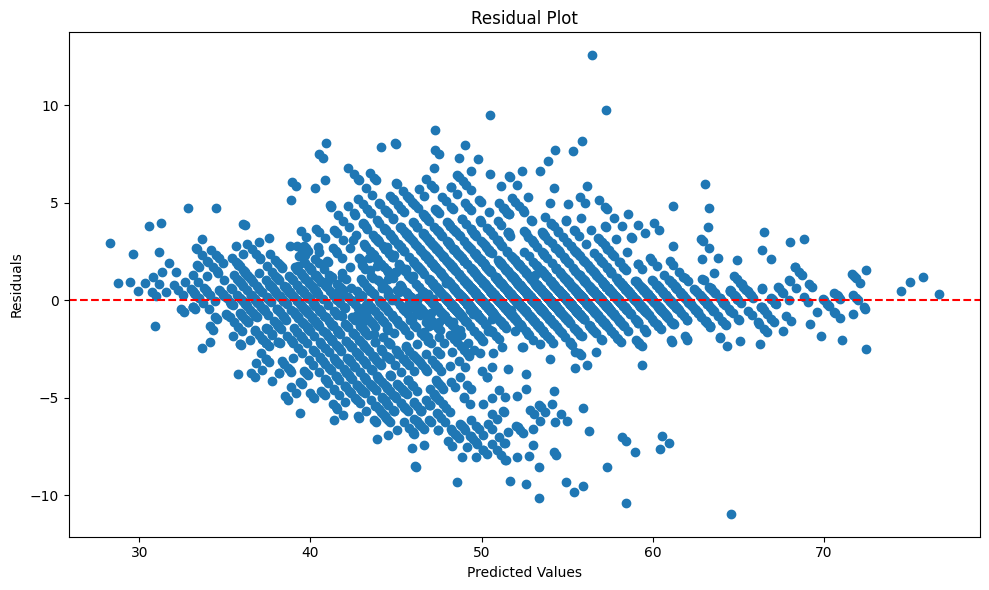

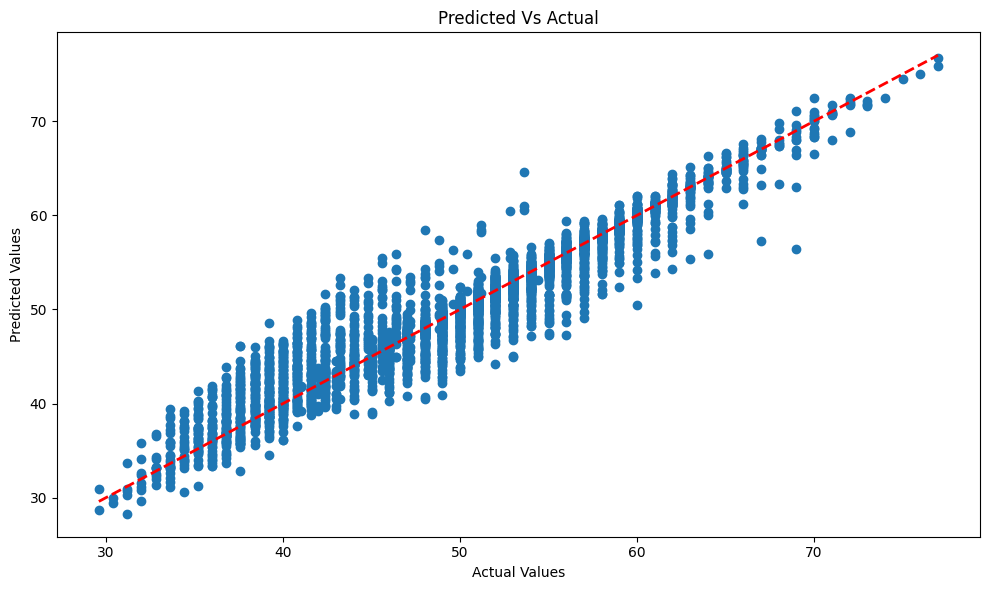

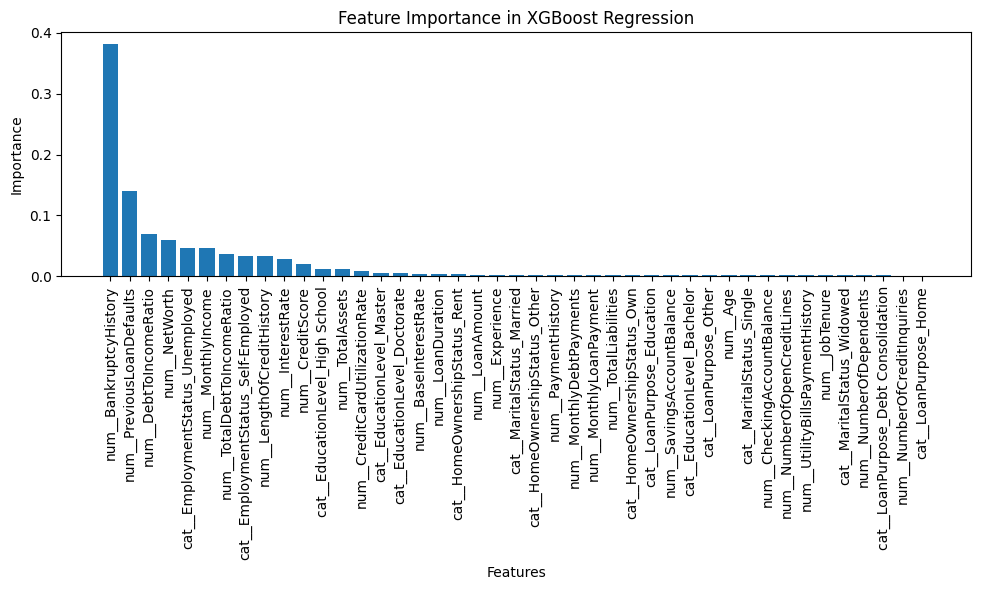

In [343]:
def evaluate_regression(model, X_test, y_test):
    """
    Evaluate regression model performance
    
    Parameters:
    - model: Trained regression model
    - X_test: Test features
    - y_test: True target values
    
    Returns:
    - Dictionary of performance metrics
    """
    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    metrics = {
        'Mean Squared Error (MSE)': mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error (RMSE)': np.sqrt(mean_squared_error(y_test, y_pred)),
        'Mean Absolute Error (MAE)': mean_absolute_error(y_test, y_pred),
        'R-squared (R2) Score': r2_score(y_test, y_pred)
    }
    
    # Print metrics
    print("Performance Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    # Residual Plot
    plt.figure(figsize=(10, 6))
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.tight_layout()
    plt.show()
    
    # Predicted vs Actual Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted Vs Actual')
    plt.tight_layout()
    plt.show()
    
    return metrics

def fine_tune_regression(model, X_train, y_train, X_test, y_test):
    """
    Perform hyperparameter tuning for regression model
    
    Parameters:
    - model: Base regression model
    - X_train: Training features
    - y_train: Training target values
    - X_test: Test features
    - y_test: Test target values
    
    Returns:
    - Best regression model
    - Best parameters
    """
    # Define parameter grid 
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.3],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
    
    # Set up k-fold cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Perform Grid Search
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=0
    )
    
    # Fit grid search
    grid_search.fit(X_train, y_train)
    
    # Get best model
    best_model = grid_search.best_estimator_
    
    # Print best parameters
    print('\nBest Hyperparameters:')
    for param, value in grid_search.best_params_.items():
        print(f'{param}: {value}')
    
    # Evaluate the model
    evaluate_regression(best_model, X_test, y_test)
    
    # Feature Importance Plot
    plot_feature_importance(best_model, X_train)
    
    return best_model, grid_search.best_params_


best_xgb_model, best_params = fine_tune_regression(
    model=best_model_reg,
    X_train=X_train_preprocessed,
    y_train=y_reg_train,
    X_test=X_test_preprocessed,
    y_test=y_reg_test
)

## 9.2. Fine tuning for Classification


Best Hyperparameters:
C: 10
max_iter: 1000
penalty: l1
solver: liblinear
Fine-Tuned Logistic Regression Performance Metrics:
Accuracy: 0.9675
Precision (Weighted): 0.9675
Recall (Weighted): 0.9675
F1 Score (Weighted): 0.9675

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3031
           1       0.93      0.93      0.93       969

    accuracy                           0.97      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.97      0.97      0.97      4000



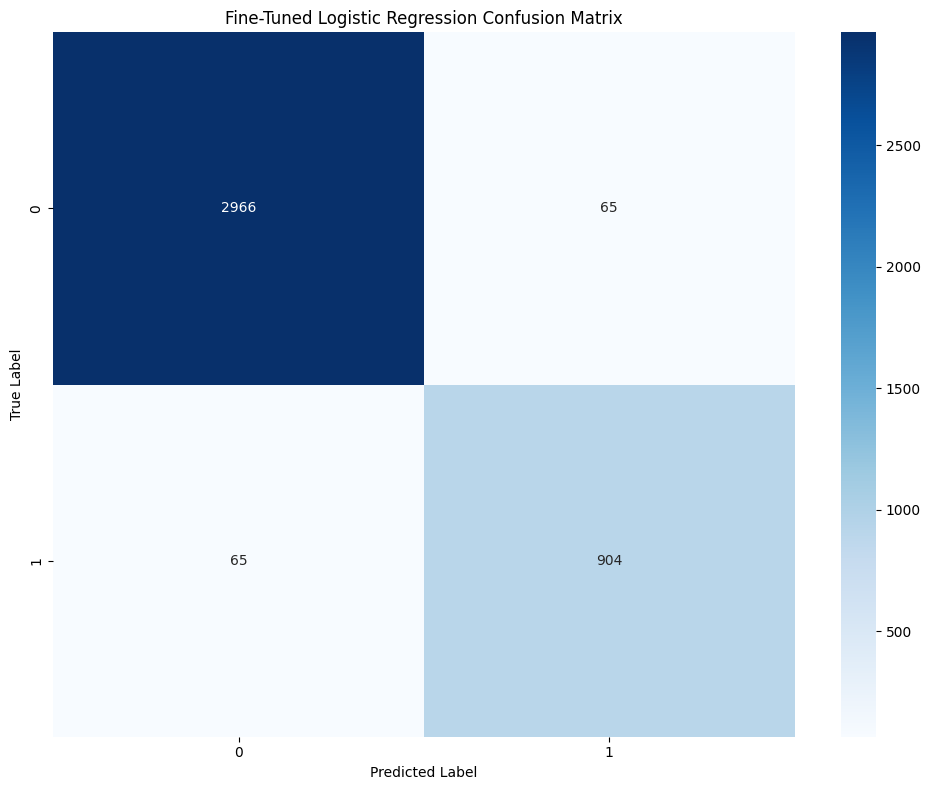

In [344]:


def evaluate_model(model, X_test, y_test, model_name='Logistic Regression'):
    # Predictions
    y_pred = model.predict(X_test)
    
    # Probability predictions for potential calibration analysis
    y_pred_proba = model.predict_proba(X_test)
    
    # Calculate metrics with multi-class support
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (Weighted)': precision_score(y_test, y_pred, average='weighted'),
        'Recall (Weighted)': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score (Weighted)': f1_score(y_test, y_pred, average='weighted')
    }
    
    # Print metrics
    print(f"{model_name} Performance Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    # Detailed classification report
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix Visualization
    plt.figure(figsize=(10, 8))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    
    return metrics

def fine_tune_model(model,X_train, y_train, X_test, y_test):
    """
    Perform comprehensive hyperparameter tuning for Logistic Regression
    
    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X_test: Test features
    - y_test: Test labels
    
    Returns:
    - Best Logistic Regression model
    - Best parameters
    """
    # Define parameter grid for Logistic Regression
    param_grid = {
        'penalty': ['l1', 'l2'],  # Regularization type
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
        'solver': ['liblinear'],  # Supports both l1 and l2 penalties
        'max_iter': [1000]  # Increased iterations to ensure convergence
    }
    
    # Set up stratified k-fold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Perform Grid Search
    grid_search = GridSearchCV(
        estimator=best_clf_model, 
        param_grid=param_grid, 
        cv=cv, 
        scoring='accuracy',  # You can change to other metrics like 'f1_weighted'
        n_jobs=-1,  # Use all available cores
        verbose=0
    )
    
    # Fit grid search
    grid_search.fit(X_train, y_train)
    
    # Get best model
    best_model = grid_search.best_estimator_
    
    # Print best parameters
    print("\nBest Hyperparameters:")
    for param, value in grid_search.best_params_.items():
        print(f"{param}: {value}")
    
    # Evaluate the best model
    evaluate_logistic_regression(best_model, X_test, y_test, 'Fine-Tuned Logistic Regression')
    
    return best_model, grid_search.best_params_

#Example usage (uncomment and modify as needed)
best_lr_model, best_params = fine_tune_model(
    model = best_clf_model,
    X_train=X_train_preprocessed,
    y_train=y_clf_train,
    X_test=X_test_preprocessed,
    y_test=y_clf_test
)



# 10. Conclusion



This project developed predictive models for **RiskScore regression** and **LoanApproval classification**, achieving strong performance through robust preprocessing and model selection. Key results include:  

- **Regression**: The **XGBoost model** demonstrated superior accuracy and reliability for predicting risk scores by effectively handling feature interactions and complex patterns in the data.  
- **Classification**: **Logistic Regression** emerged as the best model, with a **96.95% accuracy** after tuning, offering a balance of simplicity, interpretability, and strong performance.  

#### **Key Contributions and Insights**  
1. **Feature Engineering**: Identified and leveraged critical features like `CreditScore` and `AnnualIncome`, showing their predictive importance for both tasks.  
2. **Dimensionality Reduction**: PCA analysis revealed that dimensionality reduction added limited value, guiding future workflows to prioritize computational efficiency over unnecessary transformations.  
3. **Model Robustness**: The project's pipeline-based design ensures scalability and consistent application across datasets, enabling seamless integration with new data.  

#### **Impact on Research and Applications**  
- **Enhanced Decision-Making**: The models offer actionable insights for loan approval systems, improving the accuracy of risk assessments and enabling fairer, data-driven lending practices.  
- **Scalable Framework**: The streamlined preprocessing and model selection methodology can be adapted to various financial datasets, fostering replicability in future research.  
- **Future Directions**: This work highlights the potential for fine-tuning advanced models like XGBoost and suggests areas like imbalanced data handling and real-time testing for further refinement.  

These results advance the field of financial risk modeling and decision support systems, paving the way for better resource allocation and predictive accuracy in lending scenarios.  